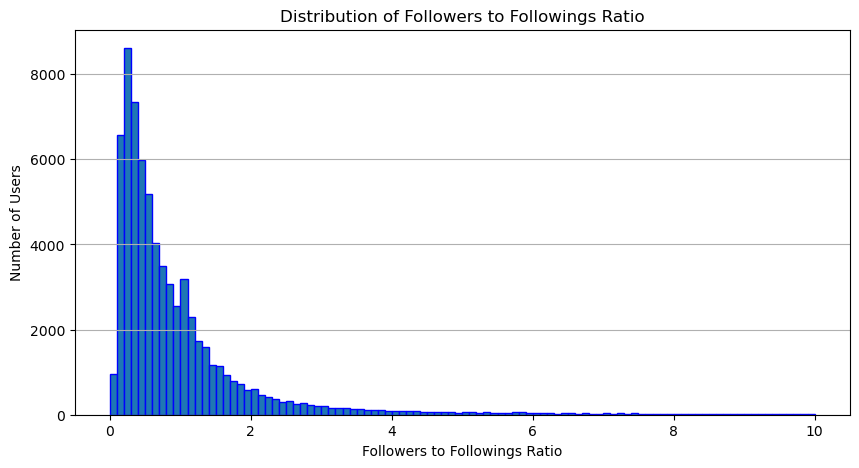

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Loading the CSV file.
instaData_csv = pd.read_csv("D:\\2-1\\SMA\\Project\\InstagramUserStats.csv")

# Ignores rows if the user is following none.
#instaData_csv = instaData_csv[instaData_csv['flg'] != 0]     

instaData_csv['flg'] = instaData_csv['flg'].replace(0, 1)        #If user follows none, assuming he is following 1 to prevent divide by zero error.

# Calculate the ratio of followers to followings.
instaData_csv['flr_to_flg_ratio'] = instaData_csv['flr'] / instaData_csv['flg']

# Plotting the data in histogram as it helps in finding how many users have a followers-to-followings ratio in a certain range.
plt.figure(figsize=(10,5))

#Bins allow to distribute data i.e data within a range comes under one bin and we have 100 such bins. Value above 10 and below 0 are ignored.
plt.hist(instaData_csv['flr_to_flg_ratio'], bins=100, edgecolor='blue', range=[0, 10])      
plt.title('Distribution of Followers to Followings Ratio')
plt.xlabel('Followers to Followings Ratio')
plt.ylabel('Number of Users')
plt.grid(axis='y')
plt.show()

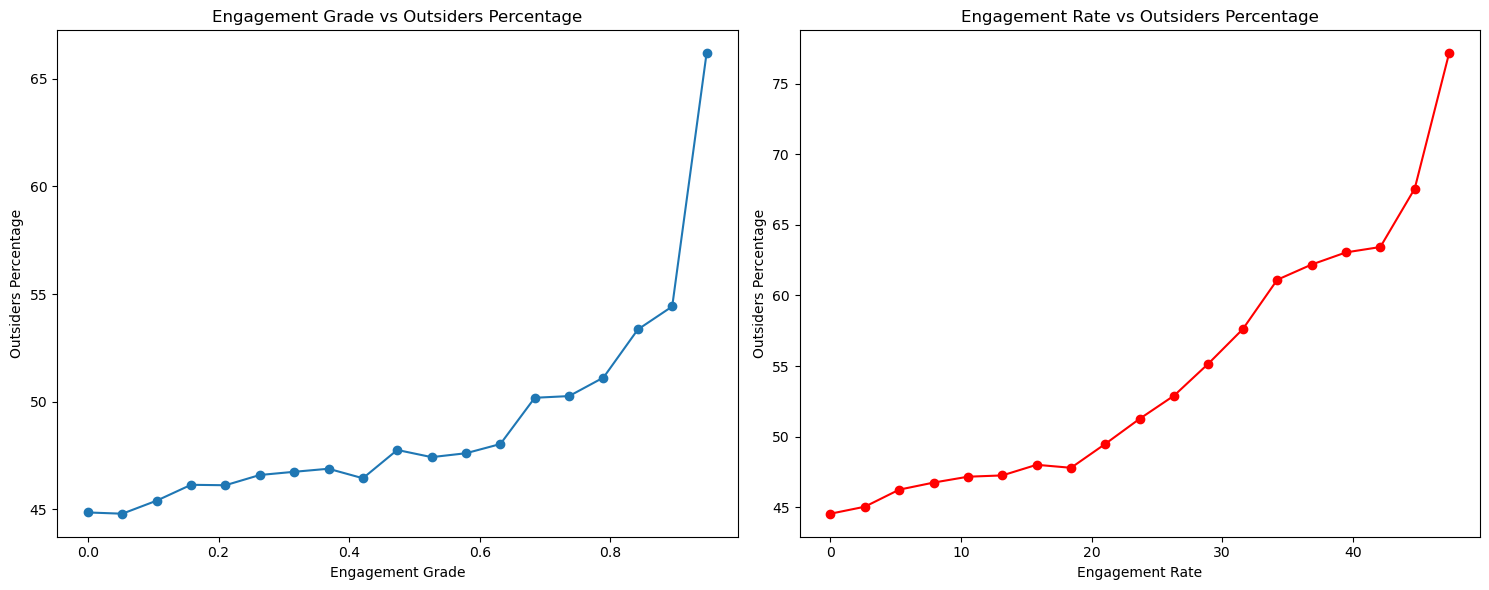

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the CSV file
instaData_csv = pd.read_csv("D:\\2-1\\SMA\\Project\\InstagramUserStats.csv")

# Calculate avg 'outsiders_percentage' for each bin of 'engagement_grade'. Here we are creating 20 equally spaced bins. eg: 15,17,18 all fall in bin 15-20
partitions = np.linspace(instaData_csv['eg'].min(), instaData_csv['eg'].max(), 20)
instaData_csv['partitioned'] = pd.cut(instaData_csv['eg'], partitions, labels=False, include_lowest=True)
avg_outsiders_per_partition = instaData_csv.groupby('partitioned')['op'].mean()

# Calculate avg 'outsiders_percentage' for each bin of 'engagement_rate'
partitions_er = np.linspace(instaData_csv['er'].min(), instaData_csv['er'].max(), 20)
instaData_csv['partitioned_er'] = pd.cut(instaData_csv['er'], partitions_er, labels=False, include_lowest=True)
avg_outsiders_per_partition_er = instaData_csv.groupby('partitioned_er')['op'].mean()

# Plots two graphs side by side
fig, sub_plot = plt.subplots(1, 2, figsize=(15,6))

# First line plot for engagement_grade
sub_plot[0].plot(partitions[:-1], avg_outsiders_per_partition, marker='o')
sub_plot[0].set_title('Engagement Grade vs Outsiders Percentage')
sub_plot[0].set_xlabel('Engagement Grade')
sub_plot[0].set_ylabel('Outsiders Percentage')

# Second line plot for engagement_rate
sub_plot[1].plot(partitions_er[:-1], avg_outsiders_per_partition_er, marker='o', color='r')
sub_plot[1].set_title('Engagement Rate vs Outsiders Percentage')
sub_plot[1].set_xlabel('Engagement Rate')
sub_plot[1].set_ylabel('Outsiders Percentage')

plt.tight_layout()
plt.show()


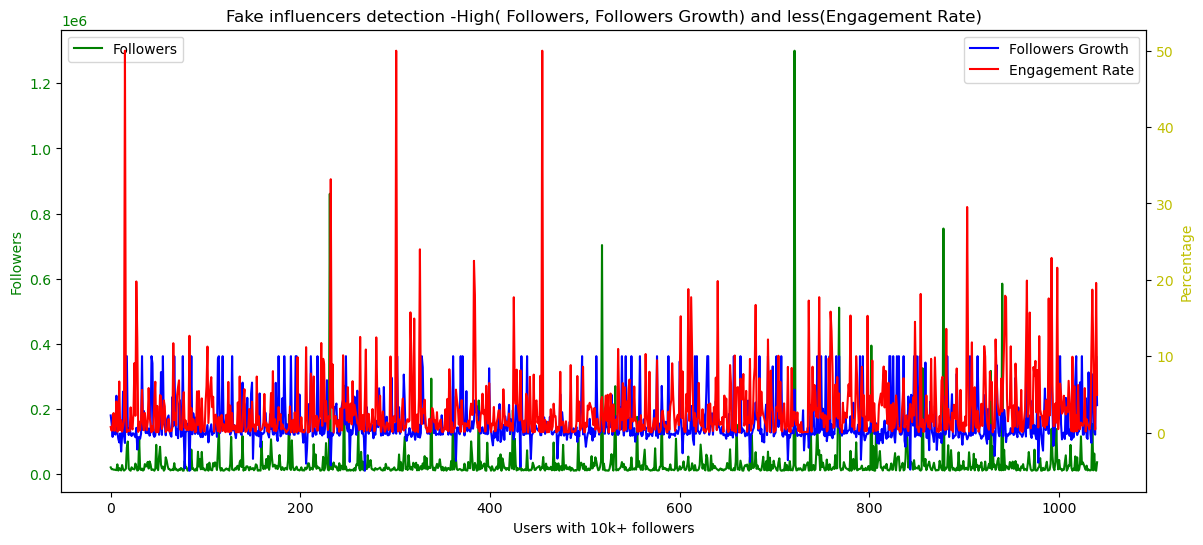

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Loading the CSV file
instaData_csv = pd.read_csv("D:\\2-1\\SMA\\Project\\InstagramUserStats.csv")

# Goal is to find influencers with fake followers. Ignoring influencer with less than 10K followers as they are not chosen for brand promotion.
influencers_data = instaData_csv[instaData_csv['flr'] > 10000].reset_index(drop=True)

fig, first_axis = plt.subplots(figsize=(14, 6))

# Plotting 'Followers' on the primary y-axis
first_axis.plot(influencers_data.index, influencers_data['flr'], color='g', label='Followers')
first_axis.set_xlabel('Users with 10k+ followers')
first_axis.set_ylabel('Followers', color='g')
first_axis.tick_params(axis='y', labelcolor='g')

# Twinx allows us to create a second y-axis sharing the same x-axis
second_axis = first_axis.twinx()
# Plotting 'Followers Growth' and 'Engagement Rate' on the secondary y-axis
second_axis.plot(influencers_data.index, influencers_data['fg'], color='b', label='Followers Growth')
second_axis.plot(influencers_data.index, influencers_data['er'], color='r', label='Engagement Rate')
second_axis.set_ylabel('Percentage', color='y')
second_axis.tick_params(axis='y', labelcolor='y')

first_axis.legend(loc='upper left')    # Legend will show labels for lines plotted on second_axis, such as 'Followers Growth' and 'Engagement Rate'.
second_axis.legend(loc='upper right')   #These can be found on upper left corner of the graph as defined.

plt.title('Fake influencers detection -High( Followers, Followers Growth) and less(Engagement Rate)')
plt.show()

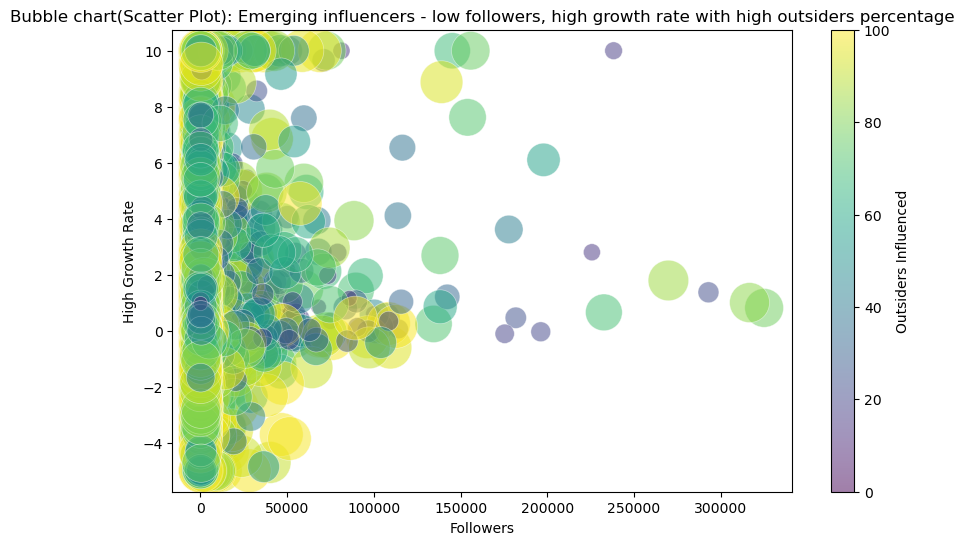

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Loading the CSV file
instaData_csv = pd.read_csv("D:\\2-1\\SMA\\Project\\InstagramUserStats.csv")

# We are creating bubble plot. Motive: Emerging influencers - low followers, high growth rate with high outsiders percentage
threshold = 0.3 * instaData_csv['flr'].max()
filtered_instaData_csv = instaData_csv[instaData_csv['flr'] <= threshold]       #Users with followers equivalent to atmost 30% of maximum followers any user could have.

plt.figure(figsize=(10, 6))

plt.scatter(
    filtered_instaData_csv['flr'], 
    filtered_instaData_csv['fg'], 
    s=filtered_instaData_csv['op']*10,        #Adjusting bubble size
    c=filtered_instaData_csv['op'], 
    cmap='viridis',                           #Popular color map to plot data - colors allow to visualize data effectively.
    alpha=0.5,                                #blending value(opacity)
    edgecolors="w", 
    linewidth=0.5
)

# Adding colorbar for growth
c_bar = plt.colorbar()
c_bar.set_label('Outsiders Influenced')

# Add titles and labels
plt.title('Bubble chart(Scatter Plot): Emerging influencers - low followers, high growth rate with high outsiders percentage')
plt.xlabel('Followers')
plt.ylabel('High Growth Rate')

plt.show()
